# Tutorial 7: Why is there a Jump??

---

### Introduction

Hello, in the last notebook we noticed that there is a jump with a certain feature, now we want to investigate why is that is the case. In the prevoius notebook, we noticed a jump by the 5th feature. 

first, let us call the data

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD

In [2]:
y_GD = y_GD.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(382, 2074)
(165, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_GD

In [7]:
arrimp = np.array(featImp_GD).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[ 15 205 144 153  71 180 157  60  43  86]


In [8]:
cols_ordered = df_input_GD.columns[sorted_idx][-400:]
cols_ordered

Index([1018.719,  883.052, 1229.322,   989.18,  919.703, 2450.511, 1663.015,
         975.41,  1551.55, 2002.039,
       ...
        837.687,  892.475,  874.121,  876.781,  853.123,   884.86,  877.969,
        850.046,  845.334,  857.355],
      dtype='object', length=400)

---

In [9]:
Xtrain[cols_ordered]

,1018.719,883.052,1229.322,989.180,919.703,2450.511,1663.015,975.410,1551.550,2002.039,...,837.687,892.475,874.121,876.781,853.123,884.860,877.969,850.046,845.334,857.355
228,-1.087990,-1.030926,-1.148293,-1.113318,-1.048227,-0.685276,-1.092314,-1.117591,-0.997408,-0.649178,...,-1.040947,-1.035275,-1.030146,-1.033481,-1.032521,-1.034466,-1.029368,-1.031805,-1.039755,-1.031936
474,1.300795,1.238410,1.339526,1.304189,1.260066,0.935879,1.344952,1.303722,1.300464,1.024498,...,1.210396,1.244742,1.230255,1.231594,1.220015,1.233132,1.230056,1.216652,1.215678,1.224416
273,1.150353,1.146772,1.144389,1.152049,1.143321,0.655422,1.082083,1.157107,1.084859,0.807275,...,1.127660,1.141946,1.144145,1.144791,1.137959,1.144632,1.144275,1.139449,1.133384,1.144581
285,0.908300,1.006635,0.788019,0.879218,0.985668,0.156375,0.599963,0.877727,0.541269,0.227356,...,1.017840,1.000981,1.012044,1.010621,1.020728,1.009804,1.008720,1.020247,1.022598,1.018547
20,-0.762880,-0.789648,-0.669492,-0.734424,-0.783509,0.021936,-0.357177,-0.721339,-0.196387,0.022215,...,-0.797608,-0.788356,-0.792682,-0.789674,-0.799611,-0.786075,-0.790533,-0.802299,-0.794386,-0.800824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.267932,1.262031,1.286273,1.269223,1.266144,1.333936,1.362730,1.273116,1.383025,1.328693,...,1.240678,1.262327,1.258593,1.259826,1.246070,1.264388,1.259422,1.246331,1.244710,1.247542
71,-0.988367,-0.964915,-0.996997,-0.994270,-0.962605,0.076077,-0.790307,-0.989817,-0.598052,0.041415,...,-0.981073,-0.963380,-0.965990,-0.963353,-0.978024,-0.959486,-0.964945,-0.978210,-0.975422,-0.977062
287,1.158114,1.096258,1.181571,1.176683,1.108657,0.086486,0.903432,1.182322,0.697978,0.130295,...,1.088064,1.103508,1.098137,1.097991,1.090781,1.102332,1.098439,1.096154,1.096031,1.091843
66,-1.341772,-1.283949,-1.473712,-1.379037,-1.292361,-1.654704,-1.660482,-1.387514,-1.700697,-1.668134,...,-1.292153,-1.282100,-1.279279,-1.279909,-1.284921,-1.277541,-1.281256,-1.285772,-1.282308,-1.285889


### RFE

In [10]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [11]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
for i in range (1, 6):
    print(i)
    rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit RFE
    rfe.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if rfe.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        
    print()
    selected.append(selected_feat)
    
    
    

1
Column: 170, Selected True, Rank: 1.000

2
Column: 170, Selected True, Rank: 1.000
Column: 191, Selected True, Rank: 1.000

3
Column: 136, Selected True, Rank: 1.000
Column: 170, Selected True, Rank: 1.000
Column: 191, Selected True, Rank: 1.000

4
Column: 110, Selected True, Rank: 1.000
Column: 136, Selected True, Rank: 1.000
Column: 170, Selected True, Rank: 1.000
Column: 191, Selected True, Rank: 1.000

5
Column: 110, Selected True, Rank: 1.000
Column: 136, Selected True, Rank: 1.000
Column: 170, Selected True, Rank: 1.000
Column: 191, Selected True, Rank: 1.000
Column: 201, Selected True, Rank: 1.000



---

In [12]:
selected

[[170],
 [170, 191],
 [136, 170, 191],
 [110, 136, 170, 191],
 [110, 136, 170, 191, 201]]

In [13]:
from itertools import combinations

input = selected[-1]

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
selected2 = output[1:] 
selected2

[[110],
 [136],
 [170],
 [191],
 [201],
 [110, 136],
 [110, 170],
 [110, 191],
 [110, 201],
 [136, 170],
 [136, 191],
 [136, 201],
 [170, 191],
 [170, 201],
 [191, 201],
 [110, 136, 170],
 [110, 136, 191],
 [110, 136, 201],
 [110, 170, 191],
 [110, 170, 201],
 [110, 191, 201],
 [136, 170, 191],
 [136, 170, 201],
 [136, 191, 201],
 [170, 191, 201],
 [110, 136, 170, 191],
 [110, 136, 170, 201],
 [110, 136, 191, 201],
 [110, 170, 191, 201],
 [136, 170, 191, 201],
 [110, 136, 170, 191, 201]]

In [14]:
len(selected2)

31

### LR

In [15]:
lr = LogisticRegression()

In [16]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [17]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [18]:
from source.ml_acc import get_accuracy_ml

In [19]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected2:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        # print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([899.598], dtype='object')
Index([1331.608], dtype='object')
Index([1330.241], dtype='object')
Index([897.107], dtype='object')
Index([1365.266], dtype='object')
Index([899.598, 1331.608], dtype='object')
Index([899.598, 1330.241], dtype='object')
Index([899.598, 897.107], dtype='object')
Index([899.598, 1365.266], dtype='object')
Index([1331.608, 1330.241], dtype='object')
Index([1331.608, 897.107], dtype='object')
Index([1331.608, 1365.266], dtype='object')
Index([1330.241, 897.107], dtype='object')
Index([1330.241, 1365.266], dtype='object')
Index([897.107, 1365.266], dtype='object')
Index([899.598, 1331.608, 1330.241], dtype='object')
Index([899.598, 1331.608, 897.107], dtype='object')
Index([899.598, 1331.608, 1365.266], dtype='object')
Index([899.598, 1330.241, 897.107], dtype='object')
Index([899.598, 1330.241, 1365.266], dtype='object')
Index([899.598, 897.107, 1365.266], dtype='object')
Index([1331.608, 1330.241, 897.107], dtype='object')
Index([1331.608, 1330.241, 1365.

---

In [22]:
# ml_dicts

In [20]:
import json

In [21]:
with open('ml_gd_inv2.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [22]:
import json
with open('ml_gd_inv2.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_gd.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [23]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,[110]', 'lr,[136]', 'lr,[170]', 'lr,[191]', 'lr,[201]', 'lr,[110, 136]', 'lr,[110, 170]', 'lr,[110, 191]', 'lr,[110, 201]', 'lr,[136, 170]', 'lr,[136, 191]', 'lr,[136, 201]', 'lr,[170, 191]', 'lr,[170, 201]', 'lr,[191, 201]', 'lr,[110, 136, 170]', 'lr,[110, 136, 191]', 'lr,[110, 136, 201]', 'lr,[110, 170, 191]', 'lr,[110, 170, 201]', 'lr,[110, 191, 201]', 'lr,[136, 170, 191]', 'lr,[136, 170, 201]', 'lr,[136, 191, 201]', 'lr,[170, 191, 201]', 'lr,[110, 136, 170, 191]', 'lr,[110, 136, 170, 201]', 'lr,[110, 136, 191, 201]', 'lr,[110, 170, 191, 201]', 'lr,[136, 170, 191, 201]', 'lr,[110, 136, 170, 191, 201]'])


In [24]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [25]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [75]:
def numbers_to_col(argument):
    switcher = {
        0: "blue",
        5: "red",
        15: "green",
        25: "orange",
        30: "brown",
    }
 
    return switcher.get(argument, "nothing")

In [76]:
print(arr_all[0][0])

['lr,[110]', 'lr,[136]', 'lr,[170]', 'lr,[191]', 'lr,[201]', 'lr,[110, 136]', 'lr,[110, 170]', 'lr,[110, 191]', 'lr,[110, 201]', 'lr,[136, 170]', 'lr,[136, 191]', 'lr,[136, 201]', 'lr,[170, 191]', 'lr,[170, 201]', 'lr,[191, 201]', 'lr,[110, 136, 170]', 'lr,[110, 136, 191]', 'lr,[110, 136, 201]', 'lr,[110, 170, 191]', 'lr,[110, 170, 201]', 'lr,[110, 191, 201]', 'lr,[136, 170, 191]', 'lr,[136, 170, 201]', 'lr,[136, 191, 201]', 'lr,[170, 191, 201]', 'lr,[110, 136, 170, 191]', 'lr,[110, 136, 170, 201]', 'lr,[110, 136, 191, 201]', 'lr,[110, 170, 191, 201]', 'lr,[136, 170, 191, 201]', 'lr,[110, 136, 170, 191, 201]']


1
blue
0
5
5
red
5
15
10
green
15
25
10
orange
25
30
5
brown
30
31
1


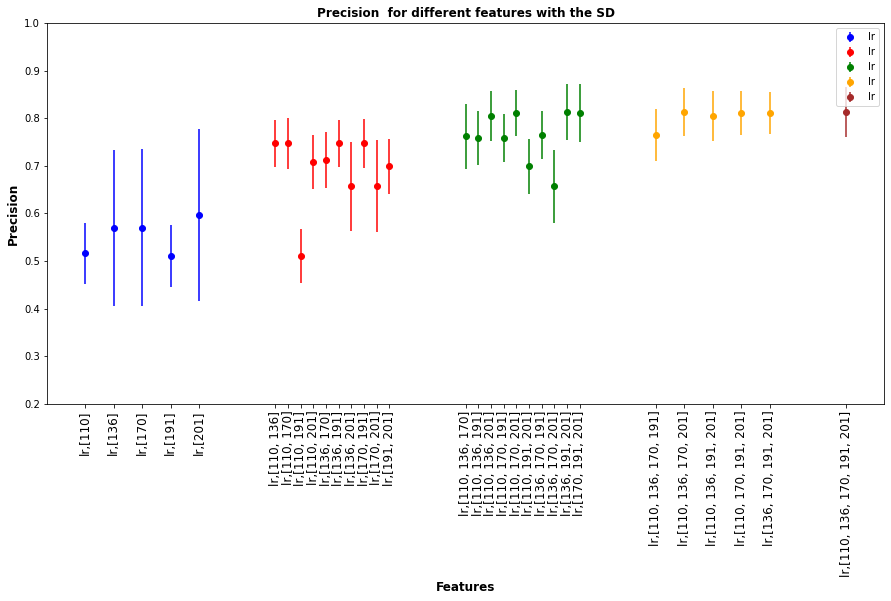

In [79]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []
p = [0, 5, 15, 25, 30, 31]
for result, model, color in zip(arr_all, models, colors):
    print(len(arr_all))
    for t in [0, 5, 15, 25, 30]:
        # if t in [0, 5, 15, 25, 30]:
        colr =  numbers_to_col(t) 

        print(colr)
        print(t)
        print(p[count+1])
        a = np.linspace(n*count, n*(1+count)-2, p[count+1] - t)
        print(len(a))
        space.extend(a)
        plt.errorbar( a, result[1][t:p[count+1]], result[2][t:p[count+1]], fmt='o', label =model[1], color = colr)
        count+=1
    tickFeat.extend(result[0])

plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [80]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

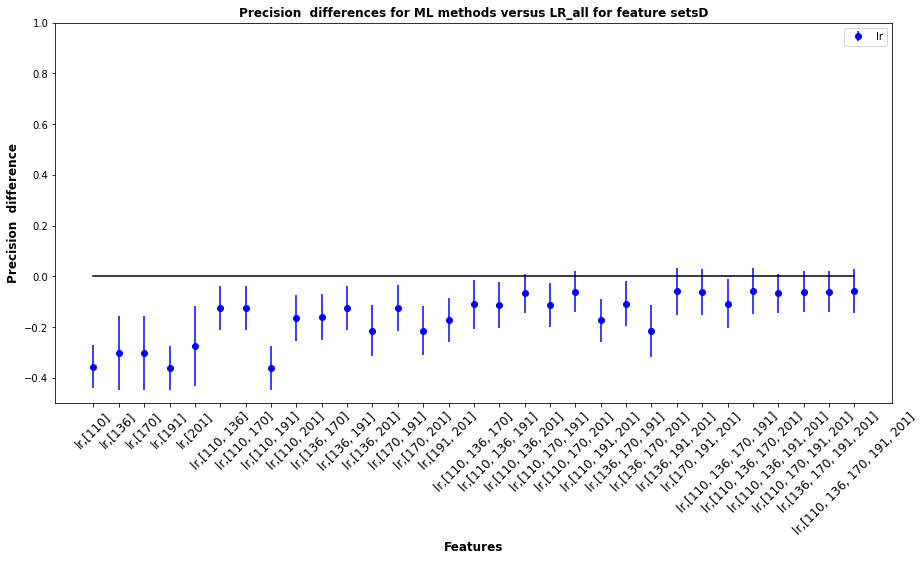

In [81]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,31)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(31*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = '45',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [ ]:
[[170],
 [170, 191],
 [136, 170, 191],
 [110, 136, 170, 191],
 [110, 136, 170, 191, 201]]

In [ ]:
[201,110, 170]